# Principal component analysis (PCA) (Eigen space). Please go through the instruction in markdown cell.  

In [2]:
from sklearn import datasets
import numpy as np
import time

import matplotlib.pyplot as plt
from typing import List, Tuple


## Load face data([ORL](https://cam-orl.co.uk/facedatabase.html)) from sklearn datasets or you can load your own data. The dataset description are [here](https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset). If you are running first time, it will take a while (depending on your internet speed) to download the dataset.

In [3]:
face_data = datasets.fetch_olivetti_faces()
X = face_data.data
Y = face_data.target
num_images = X.shape[0]
r_image = int(np.sqrt(X.shape[1]))
c_image = int(np.sqrt(X.shape[1]))
print('#images: {}\nEach image size: {}x{}' .format(num_images, r_image, c_image))


#images: 400
Each image size: 64x64


## Show some random samples.

/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


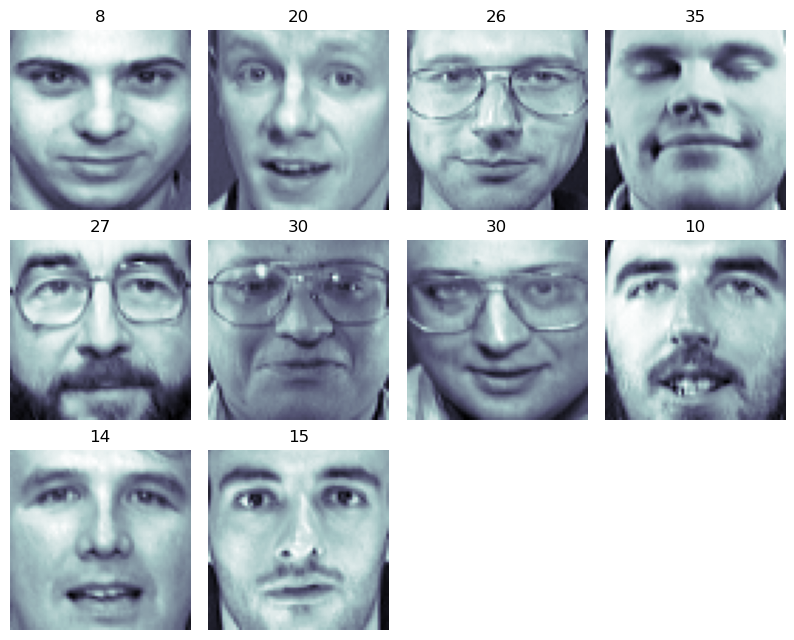

In [4]:
def subplot_images(
    images: List[np.array], 
    labels: List[str] = None, 
    size_grid: Tuple[int, int] = None,
    figsize: Tuple[int, int] = (10, 10),
    wspace: float = 0.1,
    hspace: float = -0.4
    
) -> None:
    """Plot images in a grid"""
    
    num_images = len(images)
    if size_grid is None:
        r = round(np.sqrt(num_images))
        c = np.ceil(float(num_images)/r)
        size_grid = (r, c)
        
    fig = plt.figure(figsize=figsize)
    for i in range(num_images):
        ax = fig.add_subplot(size_grid[0], size_grid[1], i+1)
        ax.imshow(images[i], cmap='bone')
        if labels is not None:
            ax.set_title(labels[i])
        ax.axis('off')
        plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()
        
        
num_rand_samples = 10
ids_rand_samples = np.random.randint(0, num_images, num_rand_samples)
images = [X[i,:].reshape(r_image, c_image) for i in ids_rand_samples]
labels = [Y[i] for i in ids_rand_samples]
subplot_images(images, labels)

### Now let's standardize the data. Substruct mean (X)  from all the images see what happen?

In [5]:
mean_X = X.mean(axis=0)
mod_X_mean = X - mean_X

## Show some random samples again. (org- original image and mn_norm- after standardize the image)


/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


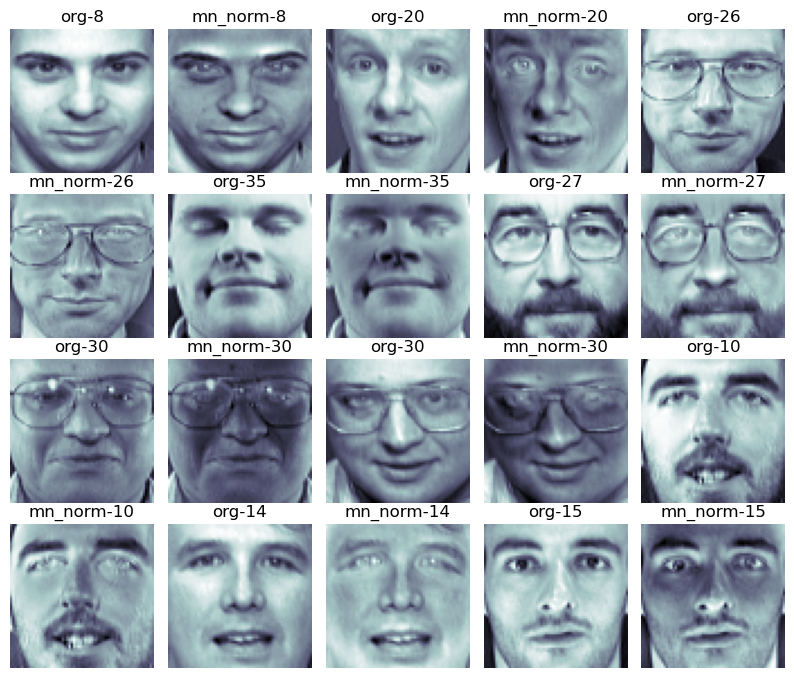

In [6]:
num_rand_samples = 10
# ids_rand_samples = np.random.randint(0, num_images, num_rand_samples)
images = []
for i in ids_rand_samples:
    images.extend([X[i,:].reshape(r_image, c_image), mod_X_mean[i,:].reshape(r_image, c_image)])
# images = [mod_X[i,:].reshape(r_image, c_image) for i in ids_rand_samples]
labels = [Y[i] for i in ids_rand_samples]
labels = []
for i in ids_rand_samples:
    labels.extend(['org-'+str(Y[i]), 'mn_norm-'+str(Y[i])])
subplot_images(images, labels)

## Find eigen values and eigen vector of the data (transpose(X)*X)


In [7]:
print('Please keep patience and imagine '
      'how long do you need to invert a matrix of size: {}x{}!' 
     .format(mod_X_mean.shape[1], mod_X_mean.shape[1]))
tic = time.time()
eig_val_mod_X_mean, eig_vec_mod_X_mean = np.linalg.eig(np.matmul(mod_X_mean.T, mod_X_mean))
print('Hurrah its done now and takes "{}" sec' .format(time.time() - tic))
sort_eig_val_ids_mod_X_mean = np.argsort(-eig_val_mod_X_mean)


Please keep patience and imagine how long do you need to invert a matrix of size: 4096x4096!
Hurrah its done now and takes "112.17153573036194" sec


## Now project and reconstruct some random data using eigen space of diff. size. Observe how they varied based on size (number of eigen values) of the eigen space.  Run multiple times and observe how they are vaied accross diff. number of eigen values?


/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


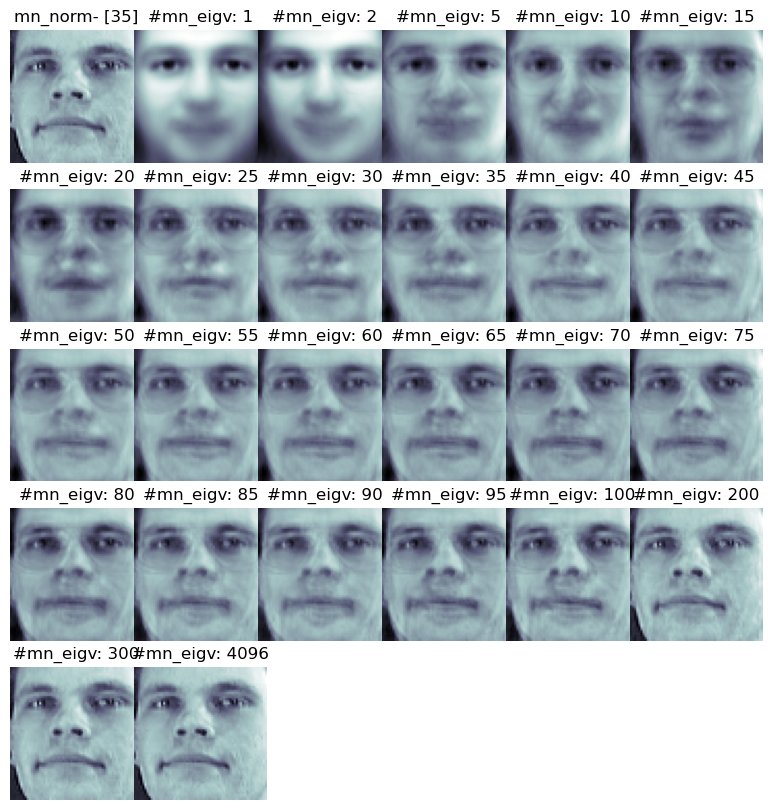

In [8]:
ids_random_single = np.random.randint(0, num_images, 1)
part_X = mod_X_mean[ids_random_single, :].reshape(1, -1)
recon_images_mod_X_mean = []
recon_images_label_mod_X_mean = []
recon_images_mod_X_mean.append((part_X + mean_X).reshape(r_image, c_image))
recon_images_label_mod_X_mean.append('mn_norm- '+str(Y[ids_random_single]))
for num_top_eig_val in [1, 2]+list(range(5, 101, 5))+[200, 300, eig_val_mod_X_mean.shape[0]]:
    top_eig_vec = eig_vec_mod_X_mean[:, sort_eig_val_ids_mod_X_mean[:num_top_eig_val]]    
    proj_part_X = np.matmul(part_X, top_eig_vec)
    recon_part_X = np.matmul(proj_part_X, top_eig_vec.T) + mean_X
    recon_images_mod_X_mean.append(recon_part_X.reshape(r_image, c_image))
    recon_images_label_mod_X_mean.append('#mn_eigv: '+str(num_top_eig_val))

subplot_images(recon_images_mod_X_mean, 
               recon_images_label_mod_X_mean,
               wspace=-0.2,
              hspace=0.2)


Hope you have observed that first `three (#eigv: 1, #eigv: 2, #eigv: 5, ..)` reconstruction looks similar accross the different number of eigen values. Can you explain why?  
    
### Let's plot each eigen vetors and see how they look?

/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


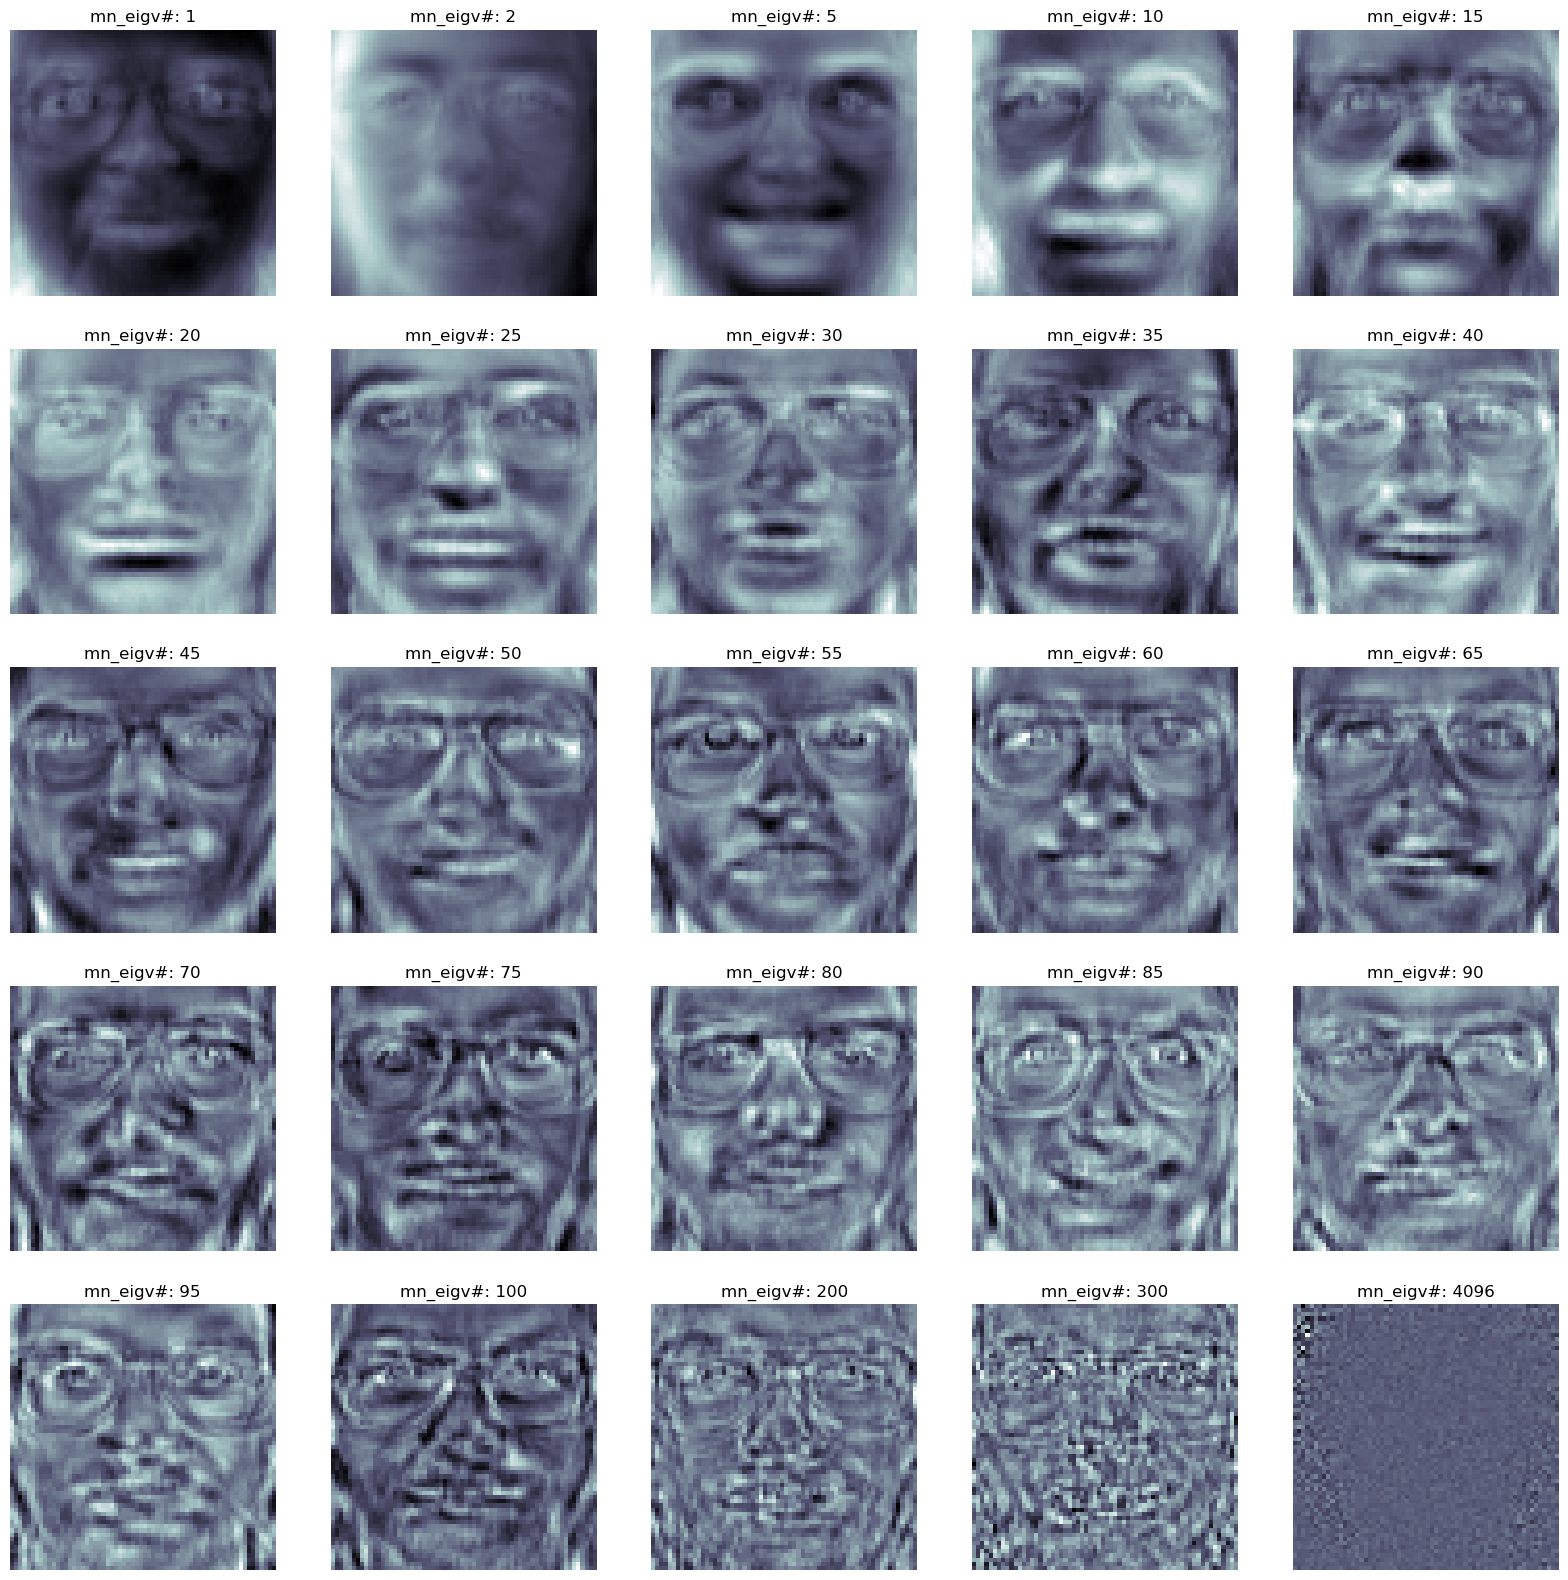

In [9]:
num_top_eig_val = [0, 1]+list(range(4, 101, 5))+[199, 299, eig_val_mod_X_mean.shape[0]-1]
top_eig_vec_images_mod_X_mean = [eig_vec_mod_X_mean[:, i].reshape(r_image, c_image) for i in sort_eig_val_ids_mod_X_mean[num_top_eig_val]]
label_top_eig_vec_images_mod_X_mean = ['mn_eigv#: '+str(i+1) for i in num_top_eig_val]

subplot_images(top_eig_vec_images_mod_X_mean, 
               label_top_eig_vec_images_mod_X_mean,
               figsize=(20, 20),
               wspace=0.2,
              hspace=0.2)



Hope you got the answer of `why?` of eigen projection space (in the last section)? You will get a better intuition when you do this on MNIST digit data!
### Project all the data in 2-dims. using eigen space and plot



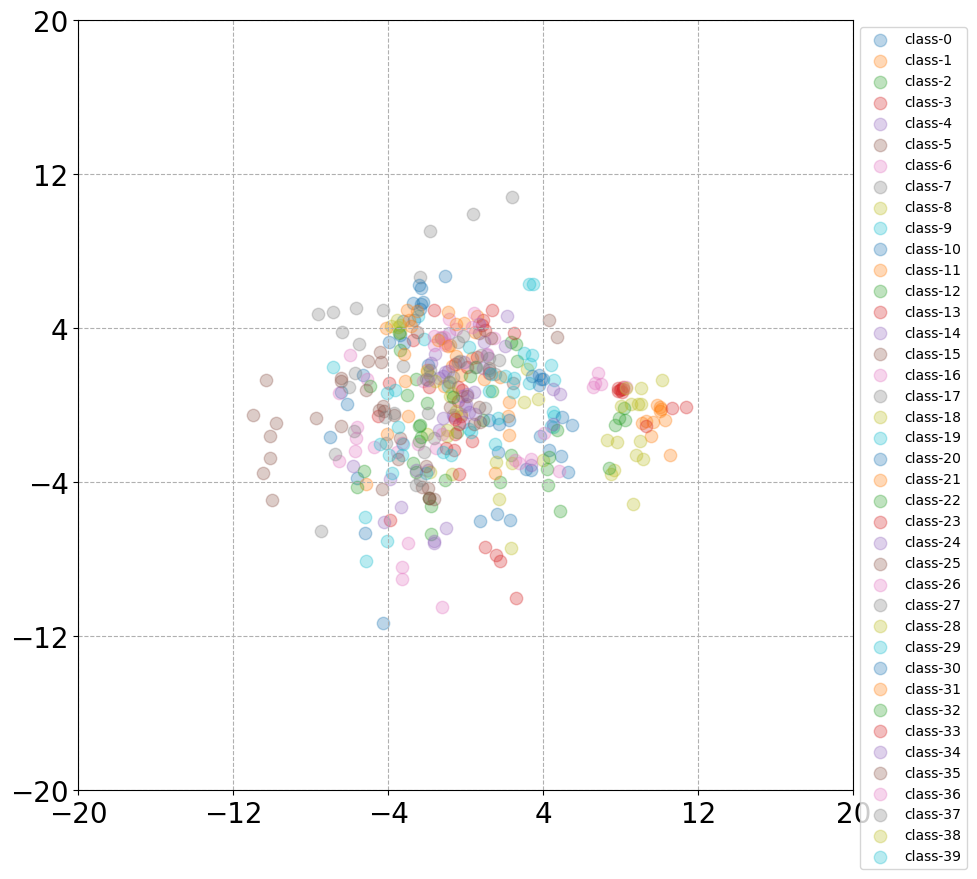

In [10]:
num_top_eig_val = 2
top_eig_vec = eig_vec_mod_X_mean[:, sort_eig_val_ids_mod_X_mean[:num_top_eig_val]]    
proj_mod_X_mean = np.matmul(mod_X_mean, top_eig_vec)

def plot_2dims_data(
    data_embedding: np.array, 
    embedding_method: str = 'pca', 
    data_label: List[int] = None, 
    figure_size: Tuple[int, int] = (10, 10),  
    xticks_step: int = 5, 
    yticks_step: int = 5, 
    xylabel_fontsize: int = 25, 
    xyticks_fontsize: int = 20, 
    pos_legend: str = 'upper left',
    bbox_to_anchor: Tuple[float, float] = (1, 1),
) -> None:
    """Plot embedded data in 2-dimensions"""
    
    # for plot axis ticks
    xticks_min = np.min(data_embedding[:, 0]) - (np.min(data_embedding[:, 0])%10.)
    xticks_max = np.max(data_embedding[:, 0]) + (10-abs(np.max(data_embedding[:, 0])%10.)) + 1
    xticks_step = int((xticks_max- xticks_min)/xticks_step)

    yticks_min = np.min(data_embedding[:, 1]) - (np.min(data_embedding[:, 1])%10.)
    yticks_max = np.max(data_embedding[:, 1]) + (10-abs(np.max(data_embedding[:, 1])%10.)) + 1
    yticks_step = int((yticks_max - yticks_min)/yticks_step)

    plt.rcParams["figure.figsize"] = figure_size
    uniques_labels = sorted(list(set(data_label)))

    # plot test data
    if data_label.shape[0]:
        for lbs in uniques_labels:
            plt.scatter(data_embedding[data_label==lbs, 0], 
                        data_embedding[data_label==lbs, 1], 
                        s=80, 
                        alpha=0.3, 
                        label='class-'+str(lbs)
                       )
    else:
        plt.scatter(data_embedding[:, 0], data_embedding[:, 1], s=3, alpha=0.3)

    plt.xticks(np.arange(xticks_min, xticks_max, step=xticks_step), fontsize=xyticks_fontsize)
    plt.yticks(np.arange(yticks_min, yticks_max, step=yticks_step), fontsize=xyticks_fontsize)
    plt.grid(linestyle='--')
    plt.legend(loc=pos_legend, bbox_to_anchor=bbox_to_anchor)
    plt.show()
    plt.close()

plot_2dims_data(proj_mod_X_mean, data_label=Y)


### Now let's try to calculate the eigen space in a bit cleaver way. Substruct mean (X)  from all the images  and standarise by std and see what happen?


In [11]:
mean_X = X.mean(axis=0)
mod_X_mean = X - mean_X
std_mod_X_mean = mod_X_mean.std(axis=0)
mod_X_mean_std = mod_X_mean/std_mod_X_mean


## Show some random samples again.  (org- original image; mn_norm- after mean subtraction the image and mn_std_norm- after mean subtraction and division by the std)


/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


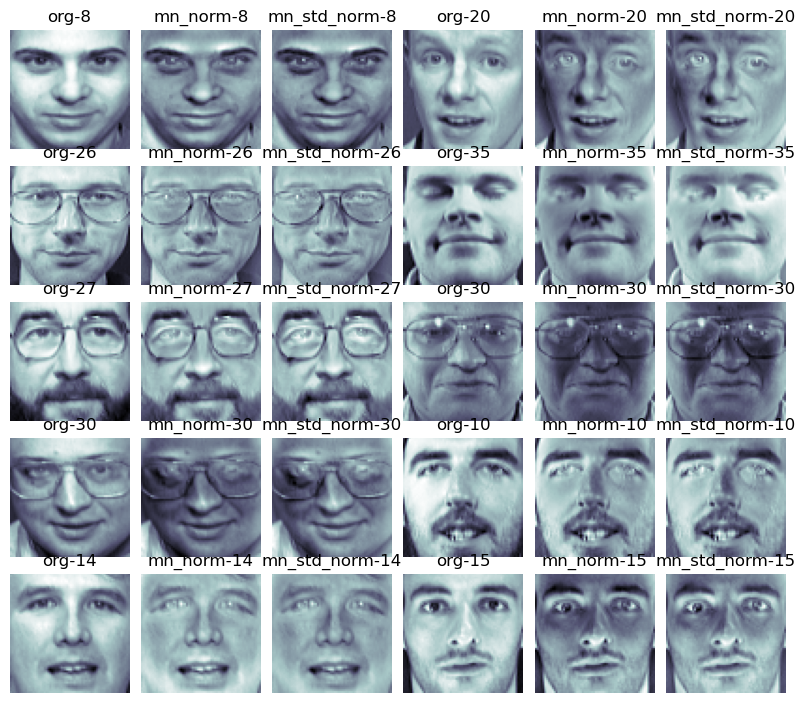

In [12]:
num_rand_samples = 10
# ids_rand_samples = np.random.randint(0, num_images, num_rand_samples)
images = []
for i in ids_rand_samples:
    images.extend([X[i,:].reshape(r_image, c_image), mod_X_mean[i,:].reshape(r_image, c_image), mod_X_mean_std[i,:].reshape(r_image, c_image)])
# images = [mod_X[i,:].reshape(r_image, c_image) for i in ids_rand_samples]
labels = [Y[i] for i in ids_rand_samples]
labels = []
for i in ids_rand_samples:
    labels.extend(['org-'+str(Y[i]), 'mn_norm-'+str(Y[i]), 'mn_std_norm-'+str(Y[i])])
subplot_images(images, labels)

## Find eigen values and eigen vector of the data (transpose(X)*X)


In [14]:
print('Please keep patience and imagine '
      'how long do you need to invert a matrix of size: {}x{}!' 
     .format(mod_X_mean_std.shape[1], mod_X_mean_std.shape[1]))
tic = time.time()
eig_val_mod_X_mean_std, eig_vec_mod_X_mean_std = np.linalg.eig(np.matmul(mod_X_mean_std.T, mod_X_mean_std))
print('Hurrah its done now and takes "{}" sec' .format(time.time() - tic))
sort_eig_val_ids_mod_X_mean_std = np.argsort(-eig_val_mod_X_mean_std)


Please keep patience and imagine how long do you need to invert a matrix of size: 4096x4096!
Hurrah its done now and takes "395.0087640285492" sec


## Now project and reconstruct some random data using eigen space of diff. size. Observe how they varied based on size (number of eigen values) of the eigen space.  


/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


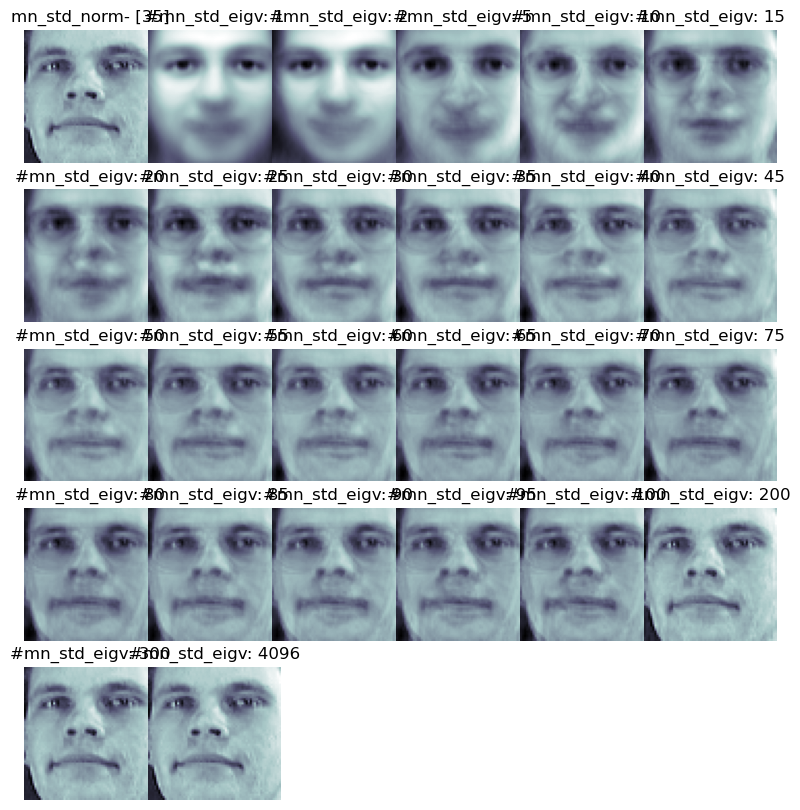

Compare with the mean standardization


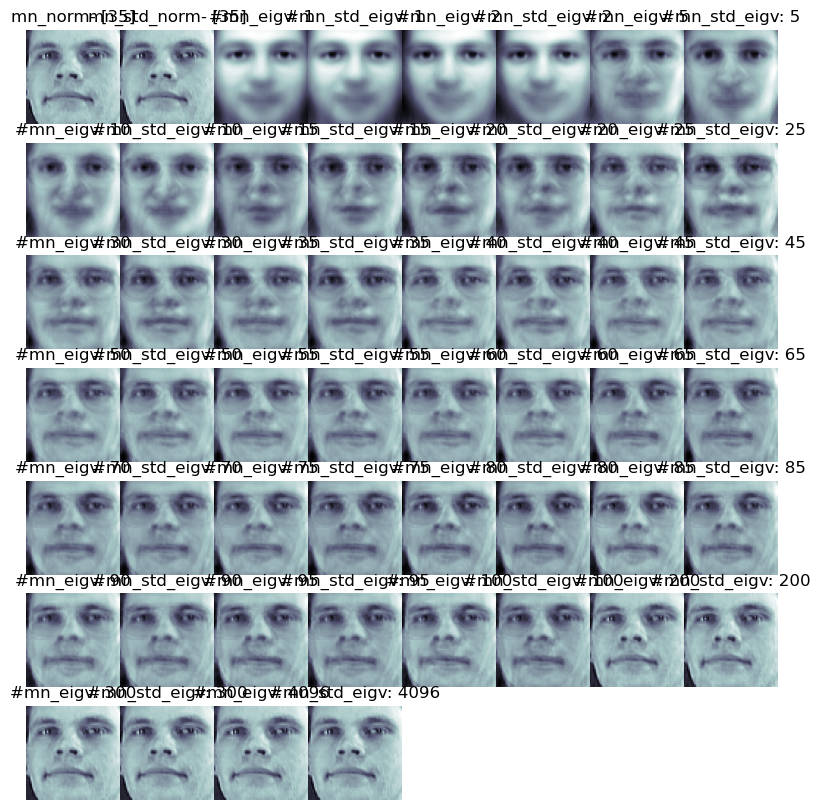

In [15]:
# ids_random_single = np.random.randint(0, num_images, 1)
part_X = mod_X_mean_std[ids_random_single, :].reshape(1, -1)
recon_images_mod_X_mean_std = []
recon_images_label_mod_X_mean_std = []
recon_images_mod_X_mean_std.append((part_X*std_mod_X_mean + mean_X).reshape(r_image, c_image))
recon_images_label_mod_X_mean_std.append('mn_std_norm- '+str(Y[ids_random_single]))
for num_top_eig_val in [1, 2]+list(range(5, 101, 5))+[200, 300, eig_val_mod_X_mean_std.shape[0]]:
    top_eig_vec = eig_vec_mod_X_mean_std[:, sort_eig_val_ids_mod_X_mean_std[:num_top_eig_val]]    
    proj_part_X = np.matmul(part_X, top_eig_vec)
    recon_part_X = np.matmul(proj_part_X, top_eig_vec.T)*std_mod_X_mean + mean_X
    recon_images_mod_X_mean_std.append(recon_part_X.reshape(r_image, c_image))
    recon_images_label_mod_X_mean_std.append('#mn_std_eigv: '+str(num_top_eig_val))

subplot_images(recon_images_mod_X_mean_std, 
               recon_images_label_mod_X_mean_std,
               wspace=-0.2,
              hspace=0.2)

print('Compare with the mean standardization')
recon_images_X_mod_X_mean_std = []
recon_images_label_X_mod_X_mean_std = []

for i in range(len(recon_images_mod_X_mean_std)):
    recon_images_X_mod_X_mean_std.extend([recon_images_mod_X_mean[i], recon_images_mod_X_mean_std[i]])
    recon_images_label_X_mod_X_mean_std.extend([recon_images_label_mod_X_mean[i], recon_images_label_mod_X_mean_std[i]])
    
subplot_images(recon_images_X_mod_X_mean_std, 
               recon_images_label_X_mod_X_mean_std,
               wspace=-0.2,
              hspace=0.2)


Hope you have observed that first `three (#eigv: 1, #eigv: 2, #eigv: 5, ..)` reconstruction looks similar accross the different number of eigen values. Can you explain why?  
    
### Let's plot each eigen vetor and see how they look?

/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


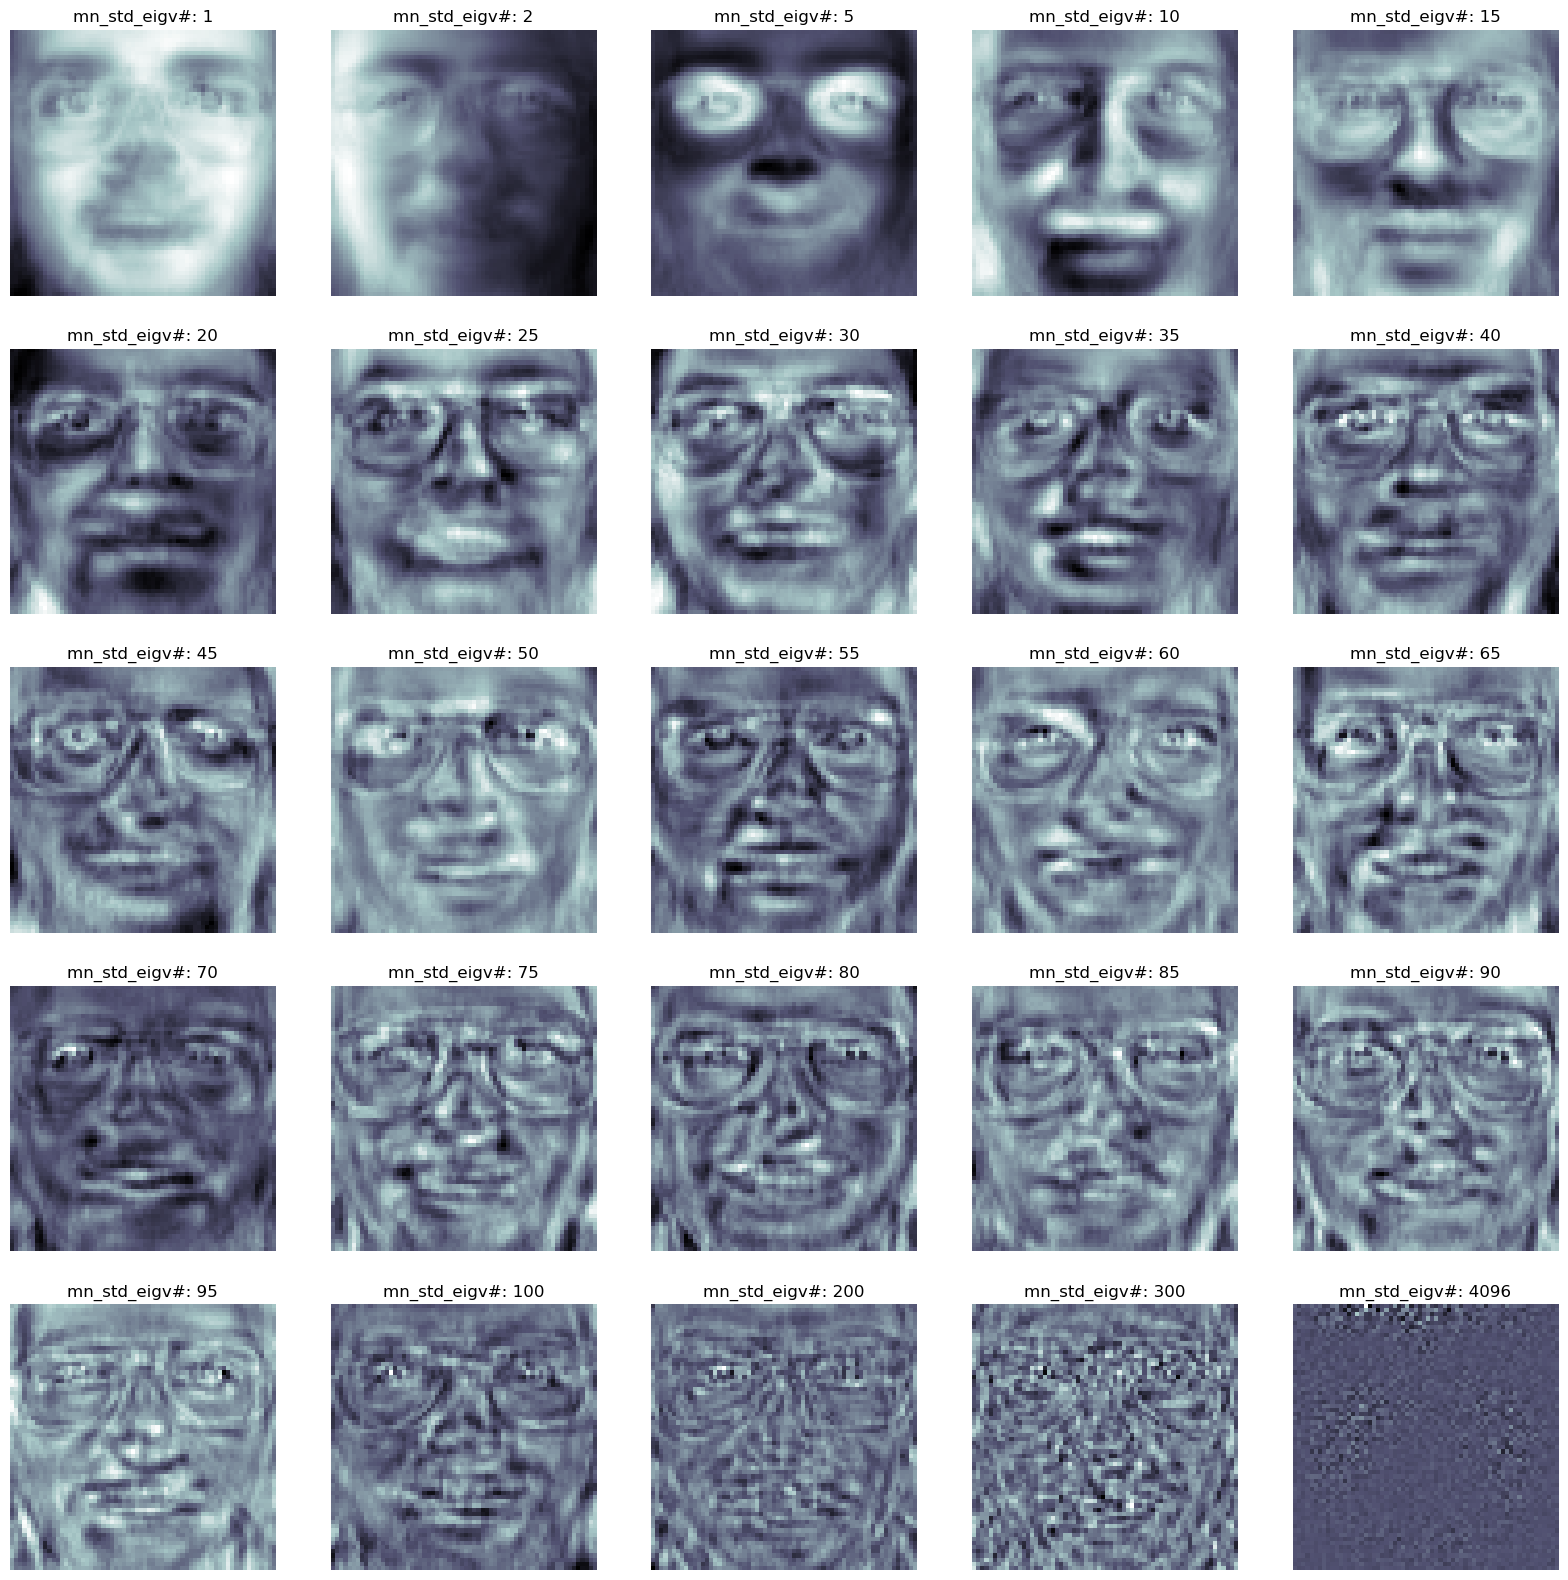

Compare with the mean standardization


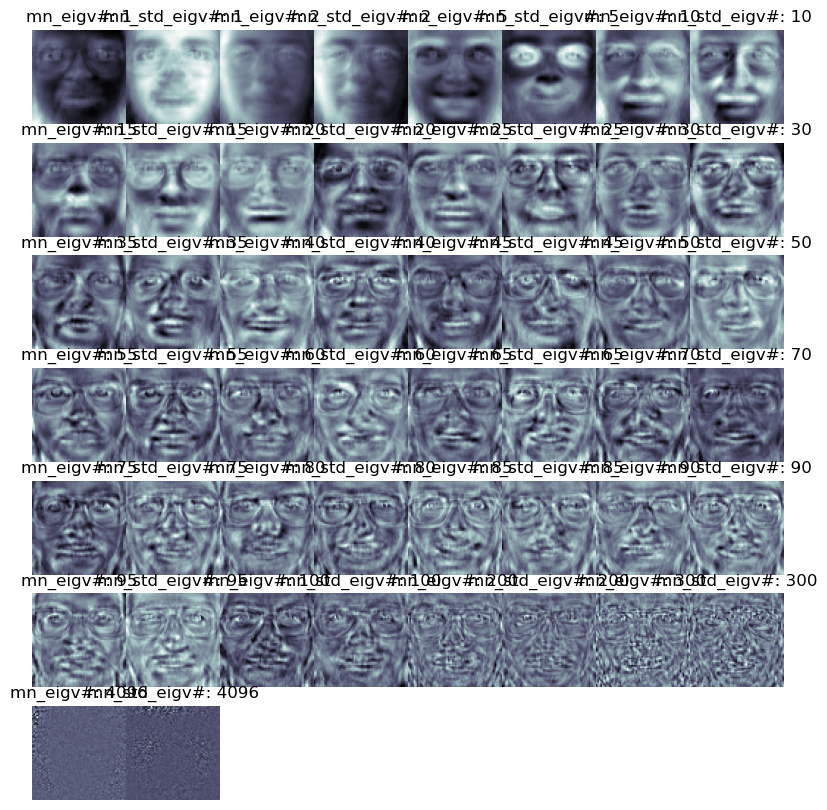

In [16]:

num_top_eig_val = [0, 1]+list(range(4, 101, 5))+[199, 299, eig_val_mod_X_mean_std.shape[0]-1]
top_eig_vec_images_mod_X_mean_std = [eig_vec_mod_X_mean_std[:, i].reshape(r_image, c_image) for i in sort_eig_val_ids_mod_X_mean_std[num_top_eig_val]]
label_top_eig_vec_images_mod_X_mean_std = ['mn_std_eigv#: '+str(i+1) for i in num_top_eig_val]

subplot_images(top_eig_vec_images_mod_X_mean_std, 
               label_top_eig_vec_images_mod_X_mean_std,
               figsize=(20, 20),
               wspace=0.2,
              hspace=0.2)

print('Compare with the mean standardization')

top_eig_vec_images_X_mod_X_mean_std = []
label_top_eig_vec_images_X_mod_X_mean_std = []
for i in range(len(top_eig_vec_images_mod_X_mean_std)):
    top_eig_vec_images_X_mod_X_mean_std.extend([top_eig_vec_images_mod_X_mean[i], top_eig_vec_images_mod_X_mean_std[i]])
    label_top_eig_vec_images_X_mod_X_mean_std.extend([label_top_eig_vec_images_mod_X_mean[i], label_top_eig_vec_images_mod_X_mean_std[i]])
    
subplot_images(top_eig_vec_images_X_mod_X_mean_std, 
               label_top_eig_vec_images_X_mod_X_mean_std,
               wspace=-0.2,
              hspace=0.2)


Hope you got the answer of `why?` of eigen projection space (in the last section)?
### Project all the data in 2-dims. using eigen space and plot



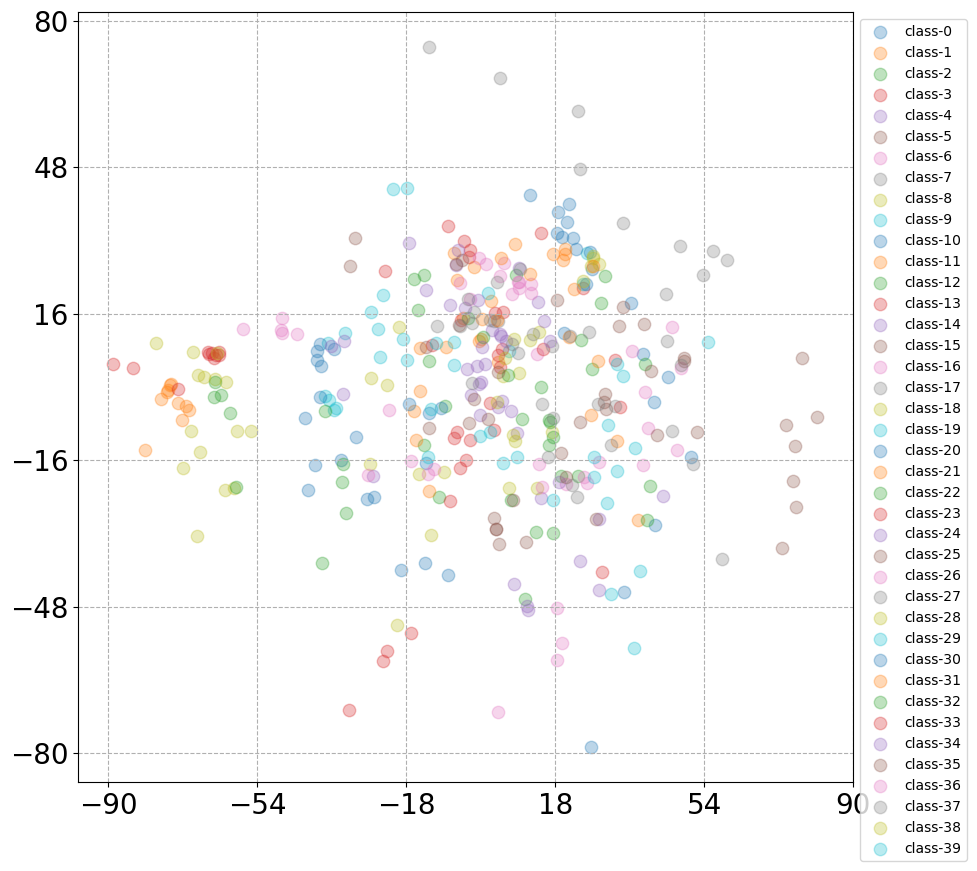

In [17]:
num_top_eig_val = 2
top_eig_vec = eig_vec_mod_X_mean_std[:, sort_eig_val_ids_mod_X_mean_std[:num_top_eig_val]]    
proj_mod_X_mean_std = np.matmul(mod_X_mean_std, top_eig_vec)

plot_2dims_data(proj_mod_X_mean_std, data_label=Y)



### Now let's try to calculate the eigen space in a bit cleaver way. As number of data samples (400) are less than the data dimension (4096). So, we use a trick to reduce the time complexity! Let's do that 


## Once again show some random samples again. (org- original image and mn_norm- after standardize the image)


/Users/soumitra/anaconda3/envs/condapy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


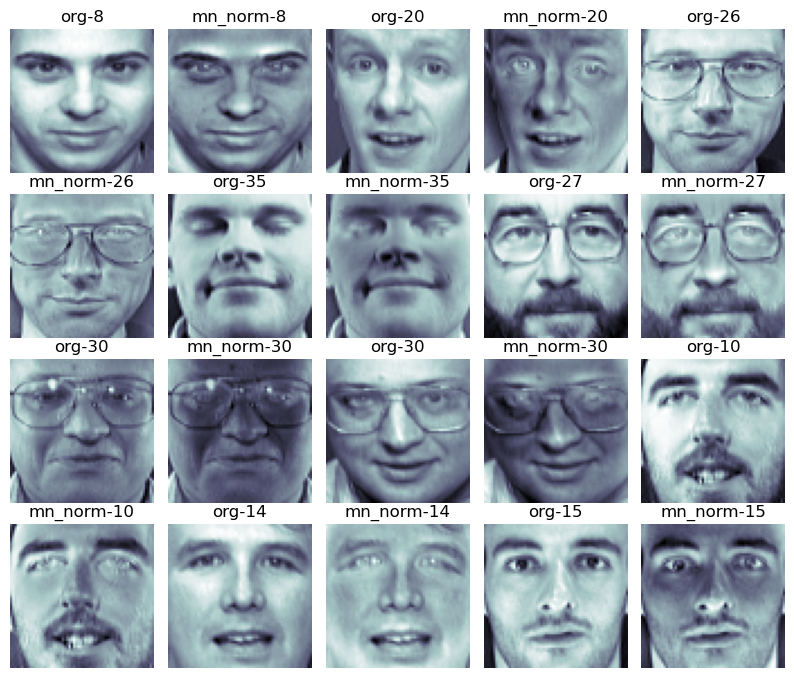

In [18]:
num_rand_samples = 10
# ids_rand_samples = np.random.randint(0, num_images, num_rand_samples)
images = []
for i in ids_rand_samples:
    images.extend([X[i,:].reshape(r_image, c_image), mod_X_mean[i,:].reshape(r_image, c_image)])
# images = [mod_X[i,:].reshape(r_image, c_image) for i in ids_rand_samples]
labels = [Y[i] for i in ids_rand_samples]
labels = []
for i in ids_rand_samples:
    labels.extend(['org-'+str(Y[i]), 'mn_norm-'+str(Y[i])])
subplot_images(images, labels)

## Find eigen values and eigen vector of the data (xxxxxxx)


In [19]:
############################################################################
#                             Your code will be here                       #
#--------------------------------------------------------------------------#

#--------------------------------------------------------------------------#
#                             End of your code                             #
############################################################################

## Now project and reconstruct some random data using eigen space of diff. size. Observe how they varied based on size (number of eigen values) of the eigen space.  Run multiple times and observe how they are vaied accross diff. number of eigen values?


In [20]:
############################################################################
#                             Your code will be here                       #
#--------------------------------------------------------------------------#

#--------------------------------------------------------------------------#
#                             End of your code                             #
############################################################################

Hope you have observed that first `three (#eigv: 1, #eigv: 2, #eigv: 5, ..)` reconstruction looks similar accross the different number of eigen values. Can you explain why?  
    
### Let's plot each eigen vetors and see how they look?

In [21]:

############################################################################
#                             Your code will be here                       #
#--------------------------------------------------------------------------#

#--------------------------------------------------------------------------#
#                             End of your code                             #
############################################################################


## Now you try on the [MNIST](http://yann.lecun.com/exdb/mnist/) digit dataset. Also, can you  compare the results with [sklearn](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html) implementation. 
